In [1]:
import pandas as pd;
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, WeekdayLocator, DayLocator

years = YearLocator()   # every year
months = MonthLocator()  # every month
days = DayLocator()  # every day
yearsFmt = DateFormatter('Y%')
monthsFmt = DateFormatter('%Y-%m')

In [10]:
calendar_data = pd.read_csv("./seattle-airbnb-open-data/calendar.csv");
listing_data  = pd.read_csv("./seattle-airbnb-open-data/listings.csv");

In [7]:
#The change in average price of available apartments
available_apartments = calendar_data[(calendar_data.available == 't')]
price = available_apartments.price
price = price.replace( '[\$,)]','', regex=True )
price = price.astype('float64')
available_apartments.loc[:, 'price'] = price

available_apartments = available_apartments[['date', 'price']]
avg_prices = available_apartments.groupby(['date']).mean()



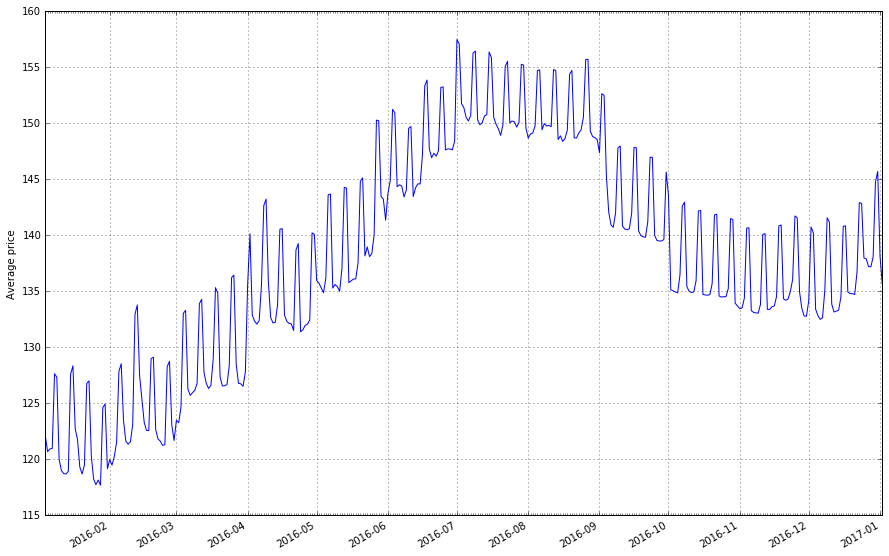

In [8]:
#Plotting average prices of apartments
dates = pd.to_datetime(avg_prices.index.values, errors='ignore')
dates = dates.astype(datetime)
dates = matplotlib.dates.date2num(dates)

fig, axs = plt.subplots(1, 1)
axs.plot_date(dates, avg_prices.price.tolist(), '-')

# format the ticks
axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(monthsFmt)
axs.xaxis.set_minor_locator(days)
axs.autoscale_view()
axs.fmt_xdata = DateFormatter('%Y-%m-%d')
axs.grid(True)
axs.set_ylabel('Average price')

fig.adjustable = True
fig.set_size_inches(15, 10) 
fig.autofmt_xdate()
plt.show()

/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


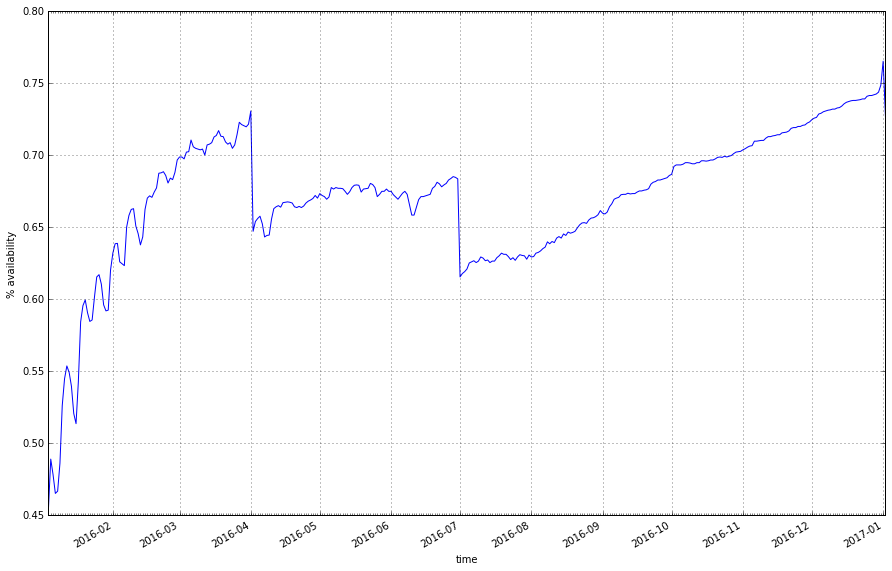

In [9]:
#The busiest days in Seattle, which equals to number of not_available_apartments over all the apartments
#in Seattle
available_apartments = calendar_data[['date', 'available']]
#convert available column to 1 if available and 0 if not to do farther grouping operation
available_clm = available_apartments.apply(lambda row : 1 if row['available'] == 't' else 0, 1)
available_apartments.loc[:,'available'] = available_clm
grouped_data   = available_apartments.groupby([available_apartments.date]).agg(['sum', 'count'])
grouped_data.loc[:, 'avg'] = grouped_data['available']['sum']/grouped_data['available']['count']

#plotting the availability over days
dates = pd.to_datetime(grouped_data.index.values, errors='ignore')
dates = dates.astype(datetime)
dates = matplotlib.dates.date2num(dates)

fig, axs = plt.subplots(1,1)
axs.plot_date(dates, grouped_data.avg.tolist(), '-')

axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(monthsFmt)
axs.xaxis.set_minor_locator(days)
axs.autoscale_view()
axs.fmt_xdata = DateFormatter('%Y-%m-%d')
axs.grid(True)
axs.set_xlabel('time')
axs.set_ylabel('% availability')

fig.adjustable = True
fig.set_size_inches(15, 10) 
fig.autofmt_xdate()
plt.show()